In [22]:
import pyslfp as sl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [2]:
## import my code

from Part_III_Project import dSL_to_dSSH, SeaSurfaceFingerPrint

# Setting up the load and model

Taken from Tutorial 2 in pyslfp

In [3]:
# 1. Initialise the fingerprint model
fp = sl.FingerPrint(lmax=256)

# 2. Set the background state to the present day
fp.set_state_from_ice_ng(version=sl.IceModel.ICE7G, date=0.0)

In [4]:
# Define the parameters for a disk load over Southern Greenland
lat_greenland, lon_greenland = 65.0, -45.0
radius_deg = 5.0
thickness_change_meters = -100.0

# Create a grid representing the change in ice thickness
ice_thickness_change = fp.disk_load(
    delta=radius_deg,
    latitude=lat_greenland,
    longitude=lon_greenland,
    amplitude=thickness_change_meters,
)

# Convert the ice thickness change into a surface mass load (in kg/m^2)
direct_load = fp.direct_load_from_ice_thickness_change(ice_thickness_change)

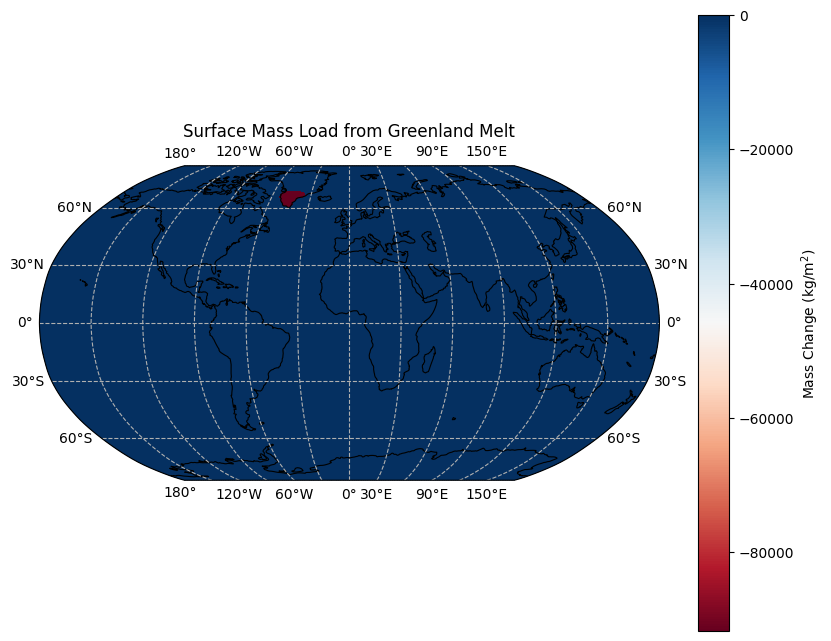

In [5]:
fig, ax, im = sl.plot(direct_load, coasts=True)
ax.set_title("Surface Mass Load from Greenland Melt")
fig.colorbar(im, ax=ax, label="Mass Change (kg/m$^2$)")
plt.show()

Getting the outputs:

In [6]:
sea_level_change, displacement, gravity_potential_change, angular_velocity_change = fp(
    direct_load=direct_load
)

Sea Level Change

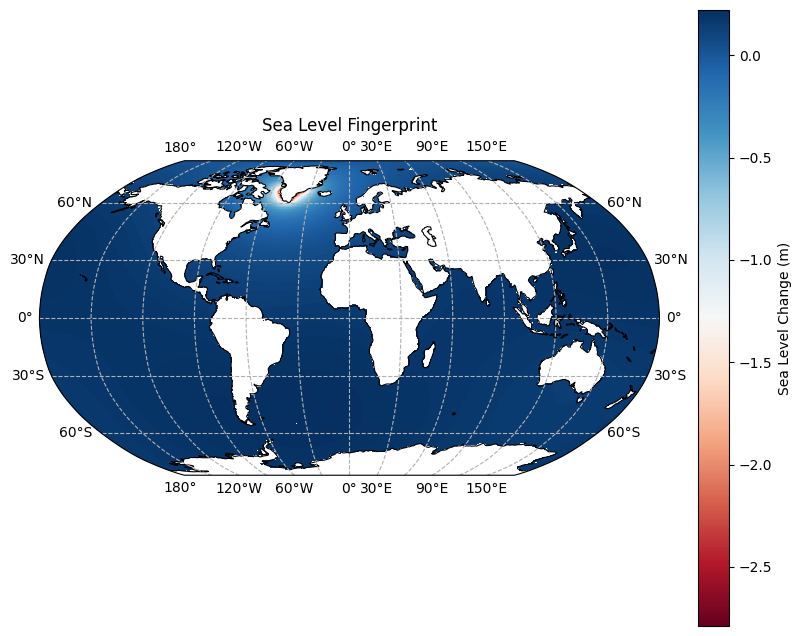

In [7]:
fig, ax, im = sl.plot(
    sea_level_change * fp.ocean_projection(),
    coasts=True,
    symmetric=False,
)
ax.set_title("Sea Level Fingerprint")
fig.colorbar(im, ax=ax, label="Sea Level Change (m)")
plt.show()

## Conversion of sea level change into sea surface change

Currently ignore dynamics and centrifugal contribution (TKTK add in latter)

In [8]:
sea_surface_change = dSL_to_dSSH(
    delta_sea_level=sea_level_change,
    delta_gravity_potential=gravity_potential_change,
)

Plotting

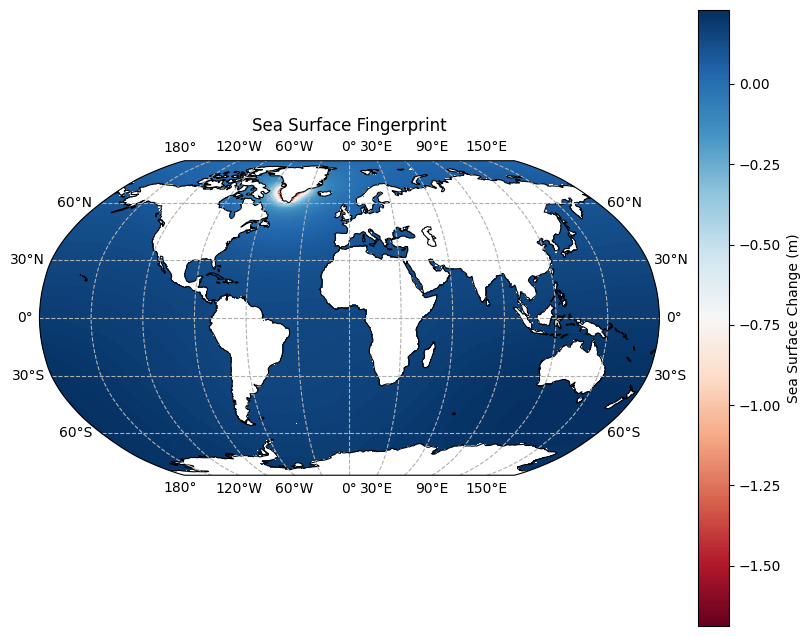

In [9]:
fig, ax, im = sl.plot(
    sea_surface_change * fp.ocean_projection(),
    coasts=True,
    symmetric=False,
)
ax.set_title("Sea Surface Fingerprint")
fig.colorbar(im, ax=ax, label="Sea Surface Change (m)")
plt.show()

Comparison of the two

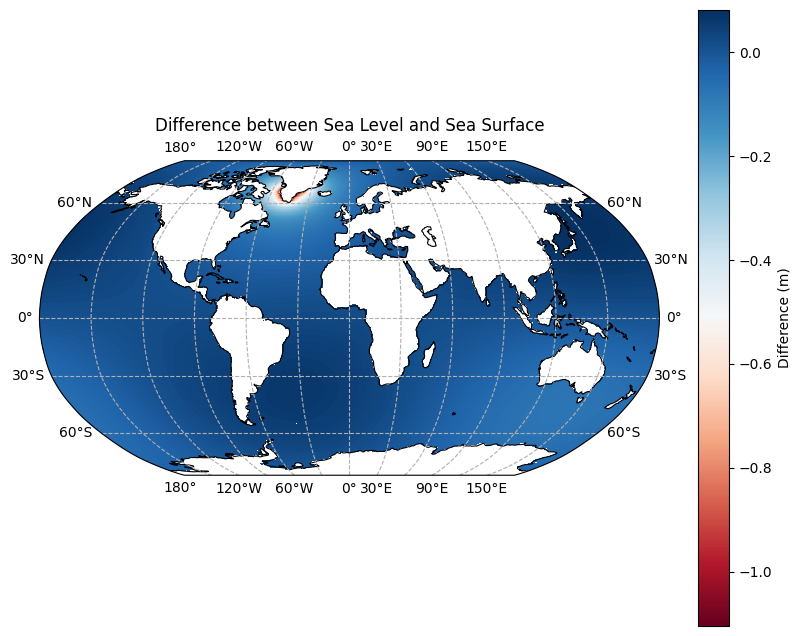

In [10]:
fig, ax, im = sl.plot(
    (sea_level_change - sea_surface_change) * fp.ocean_projection(),
    coasts=True,
    symmetric=False,
)

ax.set_title("Difference between Sea Level and Sea Surface")
fig.colorbar(im, ax=ax, label="Difference (m)")
plt.show()

## Direct calculation

Uses the extended class

In [11]:
# 1. Initialise the fingerprint model
fp_d = SeaSurfaceFingerPrint(lmax=256)

# 2. Set the background state to the present day
fp_d.set_state_from_ice_ng(version=sl.IceModel.ICE7G, date=0.0)

# Define the parameters for a disk load over Southern Greenland
lat_greenland, lon_greenland = 65.0, -45.0
radius_deg = 5.0
thickness_change_meters = -100.0

# Create a grid representing the change in ice thickness
ice_thickness_change = fp_d.disk_load(
    delta=radius_deg,
    latitude=lat_greenland,
    longitude=lon_greenland,
    amplitude=thickness_change_meters,
)

In [12]:
# Convert the ice thickness change into a surface mass load (in kg/m^2)
direct_load = fp_d.direct_load_from_ice_thickness_change(ice_thickness_change)

sea_surface_height_change, _, _, _ = fp_d(direct_load=direct_load)

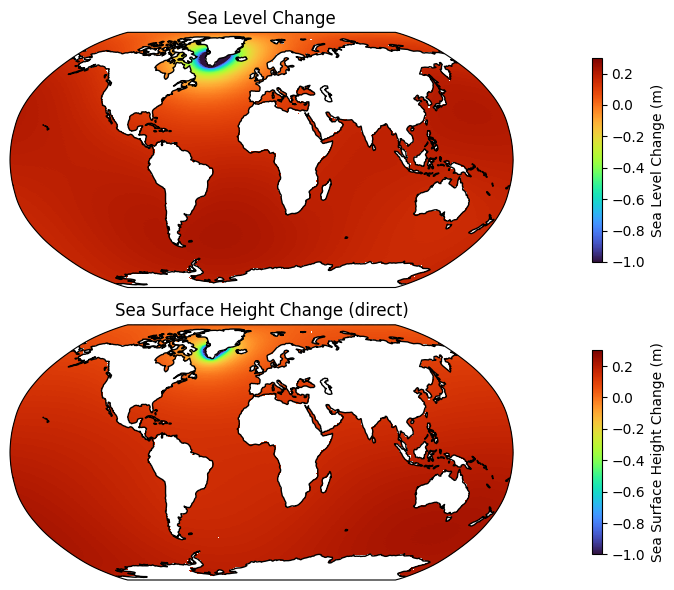

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
# Create figure with subplots
fig = plt.figure(figsize=(16, 6))
projection = ccrs.Robinson()
ax1 = fig.add_subplot(2, 1, 1, projection=projection)
ax2 = fig.add_subplot(2, 1, 2, projection=projection)

# Prepare data
data1 = sea_level_change * fp.ocean_projection()
data2 = sea_surface_height_change * fp_d.ocean_projection()

# Calculate common color limits across both datasets
vmin = -1
vmax = 0.3

# Or for symmetric color scale around zero:
# vmax = max(abs(np.nanmin(data1.data)), abs(np.nanmax(data1.data)),
#            abs(np.nanmin(data2.data)), abs(np.nanmax(data2.data)))
# vmin = -vmax

# Plot data 1
lons1 = data1.lons()
lats1 = data1.lats()
im1 = ax1.pcolormesh(
    lons1,
    lats1,
    data1.data,
    transform=ccrs.PlateCarree(),
    cmap="turbo",
    vmin=vmin,
    vmax=vmax,
)
ax1.coastlines()
ax1.set_title("Sea Level Change")
fig.colorbar(im1, ax=ax1, label="Sea Level Change (m)", shrink=0.8)

# Plot data 2
lons2 = data2.lons()
lats2 = data2.lats()
im2 = ax2.pcolormesh(
    lons2,
    lats2,
    data2.data,
    transform=ccrs.PlateCarree(),
    cmap="turbo",
    vmin=vmin,
    vmax=vmax,
)
ax2.coastlines()
ax2.set_title("Sea Surface Height Change (direct)")
fig.colorbar(im2, ax=ax2, label="Sea Surface Height Change (m)", shrink=0.8)

plt.tight_layout()
plt.show()

print("Max Change: ", max(np.nanmax(data1.data), np.nanmax(data2.data)))
print("Min Change: ", min(np.nanmin(data1.data), np.nanmin(data2.data)))